1. Veri okuma

In [2]:
import pandas as pd

# PCA ile boyutu azaltılmış verileri oku
X_train_pca = pd.read_csv("dataset/train_pca.csv")
y_train_pca = pd.read_csv("dataset/y_train_pca.csv").values.ravel()

X_test_pca = pd.read_csv("dataset/test_pca.csv")
y_test_pca = pd.read_csv("dataset/y_test_pca.csv").values.ravel()

print("PCA verisi – Eğitim:", X_train_pca.shape)
print("PCA verisi – Test:", X_test_pca.shape)

PCA verisi – Eğitim: (398040, 12)
PCA verisi – Test: (85443, 12)


2. SVM modeli eğitimi

In [3]:
from sklearn.svm import SVC

# SVM modelini tanımla
model_pca = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)

# Eğit
model_pca.fit(X_train_pca, y_train_pca)

# Tahmin yap
y_pred_pca = model_pca.predict(X_test_pca)
y_proba_pca = model_pca.predict_proba(X_test_pca)[:, 1]

3. SVM modeli eğitimi ve değerlendirme

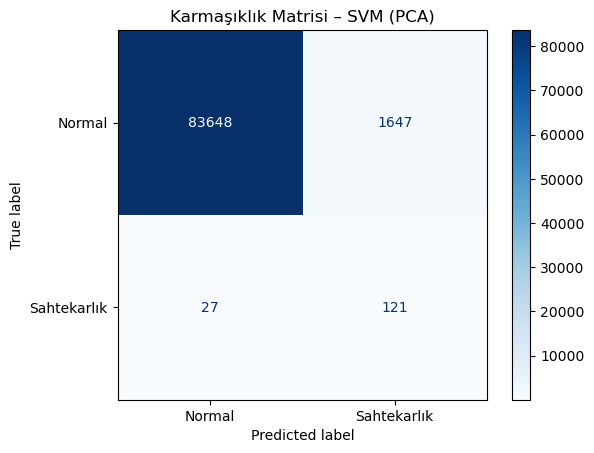

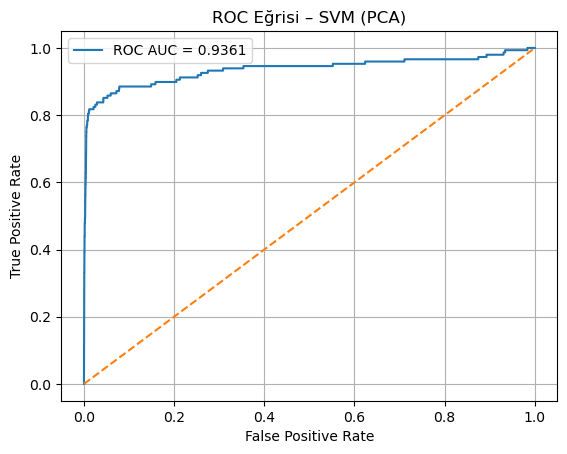

Doğruluk (Accuracy):     0.9804
Kesinlik (Precision):    0.0684
Duyarlılık (Recall):     0.8176
Özgüllük (Specificity):  0.9807
F1 Skoru:                0.1263
ROC AUC Skoru:           0.9361


In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Confusion Matrix
cm_pca = confusion_matrix(y_test_pca, y_pred_pca)
ConfusionMatrixDisplay(cm_pca, display_labels=["Normal", "Sahtekarlık"]).plot(cmap="Blues")
plt.title("Karmaşıklık Matrisi – SVM (PCA)")
plt.show()

# ROC Eğrisi
fpr, tpr, thresholds = roc_curve(y_test_pca, y_proba_pca)
roc_auc_pca = roc_auc_score(y_test_pca, y_proba_pca)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc_pca:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Eğrisi – SVM (PCA)")
plt.legend()
plt.grid()
plt.show()

# Metrikler
accuracy = accuracy_score(y_test_pca, y_pred_pca)
precision = precision_score(y_test_pca, y_pred_pca)
recall = recall_score(y_test_pca, y_pred_pca)
f1 = f1_score(y_test_pca, y_pred_pca)
specificity = cm_pca[0,0] / (cm_pca[0,0] + cm_pca[0,1])

print(f"Doğruluk (Accuracy):     {accuracy:.4f}")
print(f"Kesinlik (Precision):    {precision:.4f}")
print(f"Duyarlılık (Recall):     {recall:.4f}")
print(f"Özgüllük (Specificity):  {specificity:.4f}")
print(f"F1 Skoru:                {f1:.4f}")
print(f"ROC AUC Skoru:           {roc_auc_pca:.4f}")